## Import Modules

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Harris Corner Detection

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html#harris-corners

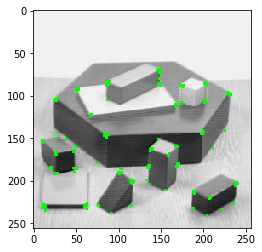

In [3]:
filename = 'img/blox.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,255,0]

plt.imshow(img)
plt.show()

# Introduction to SIFT (Scale-Invariant Feature Transform)

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html#sift-intro

In [7]:
img = cv2.imread('img/home.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT()
# sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray, None)

img=cv2.drawKeypoints(gray,kp)

cv2.imwrite('sift_keypoints.jpg',img)

AttributeError: module 'cv2.cv2' has no attribute 'SIFT'

# Introduction to SURF (Speeded-Up Robust Features)

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_surf_intro/py_surf_intro.html#surf

In [3]:
img = cv2.imread('img/butterfly.jpg',0)
surf = cv2.SURF(400)
kp, des = surf.detectAndCompute(img,None)

NameError: name 'cv2' is not defined

# Feature Matching

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html#matcher

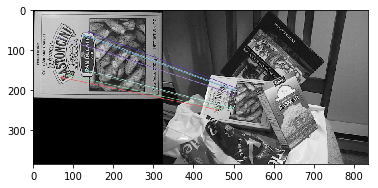

In [9]:
img1 = cv2.imread('img/box.png',0)          # queryImage
img2 = cv2.imread('img/box_in_scene.png',0) # trainImage

# Initiate SIFT detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10], flags=2, outImg=None)

plt.imshow(img3)
plt.show()